In [31]:
import os
import librosa
import numpy as np
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [32]:
PATH_TO_CLEAN = "../Dataset/train/train-clean/"
PATH_TO_NOISY = "../Dataset/train/train-noisy/"
PATH_TO_PRETRAINED_MODEL = "Speech_DeNoiser_AE/trained_models/audio_denoise_AE.h5"
PATH_TO_FINE_TUNED_MODEL = "myModel/fine_tuned_model.h5"

In [ ]:
def load_audio_files(path, sample_rate=16000, target_shape=(1024, 44)):
    audio_files = [f for f in os.listdir(path) if f.endswith('.wav')]
    mel_spectrograms = []
    
    for audio_file in audio_files:
        audio_path = os.path.join(path, audio_file)
        y, sr = librosa.load(audio_path, sr=sample_rate)
        
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        
        resized_spec = np.resize(log_mel_spec, target_shape)
        
        if resized_spec.shape[1] < target_shape[1]:
            padded_spec = np.pad(resized_spec, ((0, 0), (0, target_shape[1] - resized_spec.shape[1])), mode='constant')
        else:
            padded_spec = resized_spec[:, :target_shape[1]]
        
        mel_spectrograms.append(np.expand_dims(padded_spec, axis=-1))  
    
    return np.array(mel_spectrograms)

In [ ]:
def load_pretrained_model(model_path):
    model = keras.models.load_model(model_path)  
    return model

In [ ]:
def fine_tune_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=24):
    for layer in model.layers[:-1]:
        layer.trainable = False
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy')
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
    
    return history

In [ ]:
def main():
    clean_data = load_audio_files(PATH_TO_CLEAN, target_shape=(1024, 44))
    noisy_data = load_audio_files(PATH_TO_NOISY, target_shape=(1024, 44))  
    
    from sklearn.model_selection import train_test_split
    x_train, x_val, y_train, y_val = train_test_split(noisy_data, clean_data, test_size=0.2)
    
    model = load_pretrained_model(PATH_TO_PRETRAINED_MODEL)
    
    fine_tune_model(model, x_train, y_train, x_val, y_val)
    
    model.save(PATH_TO_FINE_TUNED_MODEL)

if __name__ == "__main__":
    main()

/var/folders/yz/1fd13cns6gvbhv48blbqlsjh0000gn/T/ipykernel_19319/2394066340.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sample_rate)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 498ms/step - loss: -64800.2344 - val_loss: -67289.5859
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - loss: -70058.7578 - val_loss: -72069.2578
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 443ms/step - loss: -74438.8516 - val_loss: -76846.7734
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 477ms/step - loss: -78338.3281 - val_loss: -81626.6875
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 469ms/step - loss: -86227.9219 - val_loss: -86408.0625
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - loss: -90984.8750 - val_loss: -91188.4375
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 430ms/step - loss: -95139.7656 - val_loss: -95919.8359
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 423ms/step - loss: -96992.4062 - val_loss: -100675.6953
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - loss: -104997.2891 - val_loss: -105465.7969
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - loss: -108895.9844 - val_loss: -110221.8594
Epoch 11/20
29/29 ━━━━━━

In [44]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [47]:
file_path_noisy = 'noisy/noisy.wav'
file_path_clean = 'result/clean_audio.wav'

In [50]:
y_noisy, sr = librosa.load(file_path_noisy, sr=None)
y_clean, _ = librosa.load(file_path_clean, sr=sr)

/var/folders/yz/1fd13cns6gvbhv48blbqlsjh0000gn/T/ipykernel_19319/2496240382.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y_clean, _ = librosa.load(file_path_clean, sr=sr)


In [ ]:
mel_noisy = librosa.feature.melspectrogram(y=y_noisy, sr=sr, n_mels=128)  
mel_clean = librosa.feature.melspectrogram(y=y_clean, sr=sr, n_mels=128) 

In [52]:
log_mel_noisy = librosa.power_to_db(mel_noisy, ref=np.max)
log_mel_clean = librosa.power_to_db(mel_clean, ref=np.max)

In [53]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Noisy Audio Waveform')

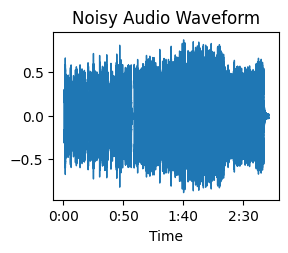

In [54]:
plt.subplot(2, 2, 1)
librosa.display.waveshow(y_noisy, sr=sr)
plt.title("Noisy Audio Waveform")

Text(0.5, 1.0, 'Clean Audio Waveform')

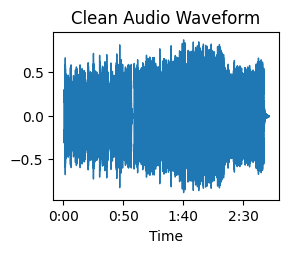

In [55]:
plt.subplot(2, 2, 2)
librosa.display.waveshow(y_clean, sr=sr)
plt.title("Clean Audio Waveform")

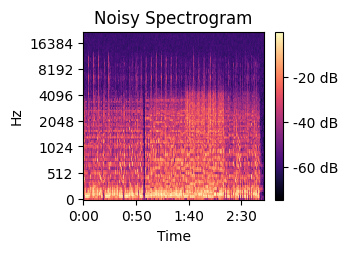

In [56]:
plt.subplot(2, 2, 3)
librosa.display.specshow(log_mel_noisy, x_axis='time', y_axis='mel', sr=sr)
plt.title("Noisy Spectrogram")
plt.colorbar(format='%+2.0f dB')

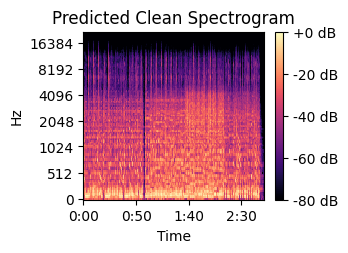

In [105]:
plt.subplot(2, 2, 4)
librosa.display.specshow(log_mel_clean, x_axis='time', y_axis='mel', sr=sr)
plt.title("Predicted Clean Spectrogram")
plt.colorbar(format='%+2.0f dB')

In [58]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
import librosa
import numpy as np
import soundfile as sf
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt

def load_audio(file_path, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    return audio

def psnr(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    max_pixel = np.max(y_true)
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def nrmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / (np.max(y_true) - np.min(y_true))

def create_mel_spectrogram(audio, sr=22050, n_mels=128):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return log_mel_spectrogram

def mel_to_audio(mel_spec, sr=22050):
    mel_spec_db = librosa.db_to_power(mel_spec)
    audio = librosa.feature.inverse.mel_to_audio(mel_spec_db)
    return audio


/var/folders/yz/1fd13cns6gvbhv48blbqlsjh0000gn/T/ipykernel_19319/2424930811.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(file_path, sr=sr)
/Users/johannasmriti/Library/Python/3.9/lib/python/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


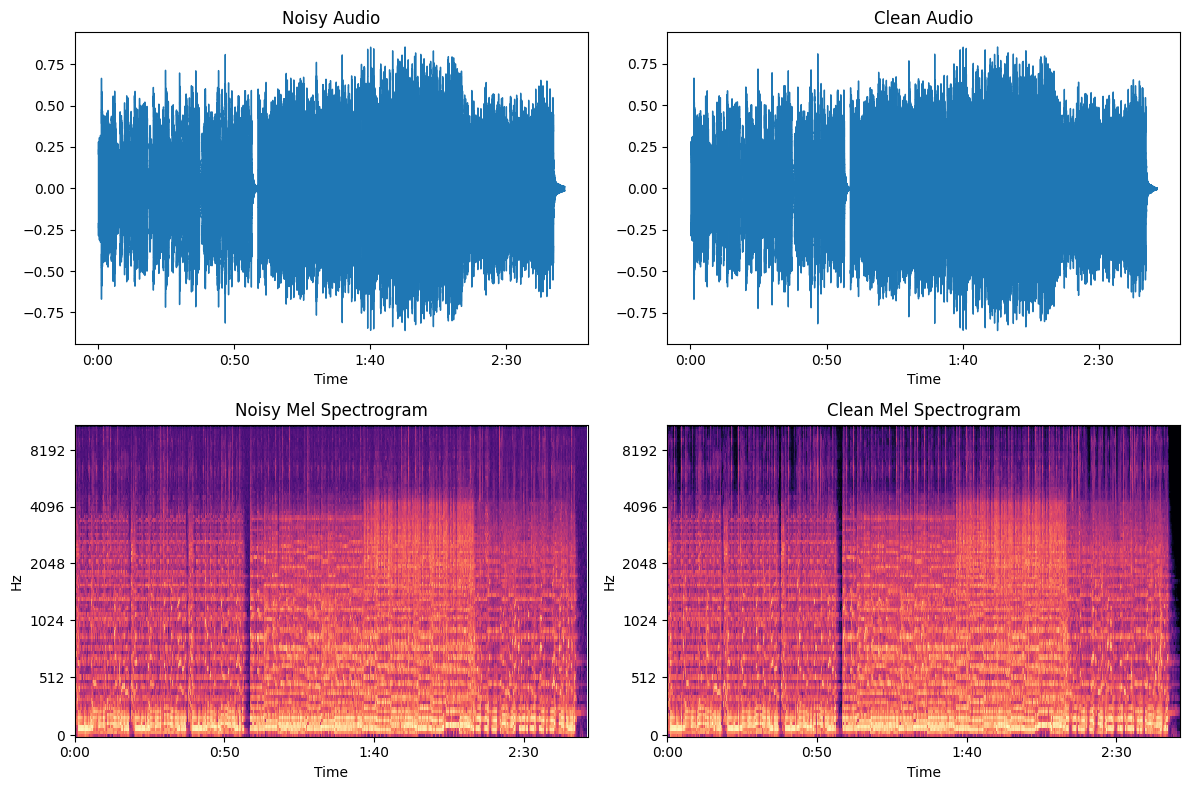

In [ ]:

noisy_audio = load_audio("noisy/noisy.wav")  
clean_audio = load_audio("result/clean_audio.wav")  

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
librosa.display.waveshow(noisy_audio, sr=22050)
plt.title("Noisy Audio")

plt.subplot(2, 2, 2)
librosa.display.waveshow(clean_audio, sr=22050)
plt.title("Clean Audio")

# Create mel spectrograms
mel_noisy = create_mel_spectrogram(noisy_audio)
mel_clean = create_mel_spectrogram(clean_audio)

plt.subplot(2, 2, 3)
librosa.display.specshow(mel_noisy, x_axis='time', y_axis='mel')
plt.title("Noisy Mel Spectrogram")

plt.subplot(2, 2, 4)
librosa.display.specshow(mel_clean, x_axis='time', y_axis='mel')
plt.title("Clean Mel Spectrogram")

plt.tight_layout()
plt.show()
